**1.Linear Regression**

**a.Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from
scikit-learn. The provided data is already normalized (see description), so there is no need for
additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.)
for each of the variables in the data set. Separate the target attribute for regression.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\Yanhong Simokat\\Desktop\\DePaul\\DSC478\\homework'

In [3]:
#load data
data = pd.read_csv("communities.csv",na_values=['?'])
data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
data.shape

(1994, 100)

In [5]:
#check missing values
mis=data.isnull().sum()
mis[mis>0]

OtherPerCap    1
dtype: int64

there is one missing value in the column OtherPerCap with numerical values, so we can fill the mean value of the column in the missing value. 

In [6]:
#fill missing value with the column mean
other=data.OtherPerCap.mean()
data['OtherPerCap'].fillna(other,axis=0,inplace=True)
data['OtherPerCap'].isnull().values.any()

False

In [7]:
#reset the index since 'state' and 'community name' are identifier attributes
#data.set_index(['state','communityname'],inplace=True)
#target attribute
data_target=data['ViolentCrimesPerPop']

In [8]:
data = data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1)

In [9]:
data.shape

(1994, 97)

In [10]:
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [11]:
pd.set_option('display.max_rows', data.describe().shape[1], 'display.max_columns', data.describe().shape[0])
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [12]:
data_target.describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

**b.Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the
RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of
the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold crossvalidation
and compare the cross-validation RMSE to the training RMSE (for cross validation, you should
use the KFoldmodule from sklearn.cross_validation).**

In [13]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from numpy import *
import numpy as np

C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x = np.array(data)
y = np.array(data_target)

In [15]:
#assume x0=1 to account for a constant offset
#in order to do multiple regression we need to add a column of 1
x = np.array([np.concatenate((i,[1])) for i in x])

In [16]:
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    #if det(A)=0 then A is not invertible. A is linearly dependent
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [17]:
#standard linear regression weights/estimated beta
weight = standRegres(x,y)

In [18]:
print weight

[[ 1.31108068e-01]
 [-3.14114977e-02]
 [ 2.09909670e-01]
 [-4.05351612e-02]
 [-1.38892919e-02]
 [ 5.89726825e-02]
 [ 1.23399025e-01]
 [-2.22621600e-01]
 [-1.47500199e-01]
 [ 5.01635477e-02]
 [-2.42413829e-01]
 [ 4.64024392e-02]
 [-1.96945615e-01]
 [-2.06117500e-01]
 [ 4.65935490e-02]
 [-1.77212915e-01]
 [ 6.30148504e-02]
 [ 1.14942190e-02]
 [-9.08951848e-02]
 [ 2.74640044e-01]
 [ 1.01752476e-01]
 [-3.31517562e-01]
 [-2.91799268e-02]
 [-3.54483393e-02]
 [ 2.26173855e-02]
 [ 4.30950137e-02]
 [ 3.44408548e-02]
 [ 1.28412458e-01]
 [-1.91293360e-01]
 [-1.00769002e-01]
 [ 6.46856092e-02]
 [ 1.06062117e-01]
 [ 2.44125993e-06]
 [ 2.34984611e-01]
 [-3.75705330e-02]
 [-7.74957660e-03]
 [ 4.66779619e-01]
 [ 2.26295907e-01]
 [ 1.74621953e-01]
 [-5.75206227e-01]
 [-1.41954207e-01]
 [ 5.68782538e-02]
 [-3.51066745e-01]
 [-3.49493414e-02]
 [ 4.63705978e-04]
 [ 5.57016681e-02]
 [-1.82238360e-01]
 [-1.54646442e-01]
 [ 1.26172899e-01]
 [-1.44320569e-01]
 [ 2.39071713e-02]
 [ 3.33390229e-02]
 [-7.4229740

In [19]:
#convert array to matrix
xmat=np.mat(x)
ymat=np.mat(y)
#predicted y
yHat=xmat*weight

In [20]:
yHat,ymat

(matrix([[0.16551838],
         [0.29062973],
         [0.38367799],
         ...,
         [0.40142767],
         [0.16882645],
         [0.37326947]]), matrix([[0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48]]))

In [21]:
#transform yHat
yHat_T=yHat.T

In [22]:
#RMSE=sqrt(sum((predict-observed)^2)/simple size)
#dot product of error vector with itself gives us SSE

In [23]:
#compute RMSE
error=abs(yHat_T-ymat)
t_err=np.dot(error, error.T)
rmse_train=np.sqrt(t_err/len(yHat))
print rmse_train

[[0.12888961]]


In [24]:
#correlation coefficient (also call correlation)
#plot the correlation between predicted and actual values of the target attribute values
corrcoef(yHat_T,ymat)

array([[1.        , 0.83294957],
       [0.83294957, 1.        ]])

In [25]:
import matplotlib.pyplot as plt
plt.plot(yHat_T,ymat,'o')
plt.plot([0,1],[0,1],'r-')
plt.title("The correlation between \n predicted and actual values of Y")
plt.xlabel('Predicted Y Values')
plt.ylabel('Actual Y Values')
plt.show()

<Figure size 640x480 with 1 Axes>

In [26]:
# Now let's compute RMSE using 10-fold cross-validation
from sklearn.cross_validation import KFold

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

kf = KFold(len(x), n_folds=10)
x_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])  #compute rmse on training data
    e = p-y[test]
    x_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(x_err/len(x))

In [27]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


**c.Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset
of features to perform linear regression. For feature selection, write a script or function that takes as input
the training data, target variable; the model; and any other parameters you find necessary, and returns the
optimal percentage of the most informative features to use. Your approach should use k-fold crossvalidation
on the training data (you can use k=5). You can
use feature_selection.SelectPercentile to find the most informative variables. Show the list of
most informative variables and their weights [Note: since this is regression not classification, you should
use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean
absolute error values on cross-validation relative to the percentage of selected features (See scikitlearn's
metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with
regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Review scikitlearn
documentation for feature selection**

1 0.11287401163402822
6 0.09943268475677307
11 0.09900510519125442
16 0.0990905907952681
21 0.0975068622131086
26 0.09534915043594905
31 0.09492194643289374
36 0.09474955355002232
41 0.09435370428857698
46 0.09466441760571027
51 0.09505109356109846
56 0.0954257382389749
61 0.09574483254772759


C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sampl

66 0.09563045814358936
71 0.09583132229767206
76 0.09516847723448739
81 0.09548089347790065
86 0.09516368543611166
91 0.09531463100110918
96 0.09533345047381277
Optimal percentile of features:[41] 

Optimal number of features:39 



C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sampl

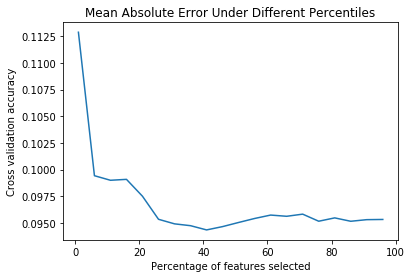

In [28]:
from sklearn import cross_validation,feature_selection
from sklearn.cross_validation import train_test_split
y = y.T
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

percentiles = range(1,100,5)
results=[]
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, X_train_fs, y_train, scoring='mean_absolute_error', cv=5))
    print i, scores.mean()
    results=np.append(results, scores.mean())

optimal_percentil = np.where(results == results.min())[0]
percentiles1 = np.array(percentiles)
print "Optimal percentile of features:{}".format(percentiles1[optimal_percentil]), "\n"
optimal_num_features = int(floor(percentiles1[optimal_percentil]*len(data.columns)/100))
print "Optimal number of features:{}".format(optimal_num_features), "\n"


# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.title("Mean Absolute Error Under Different Percentiles")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [29]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(X_train, y_train)
for i in range(len(data.columns.values)):
    if fs.get_support()[i]:
        print data.columns.values[i],'\t\t', fs.scores_[i]

population 		256.0323547372119
racepctblack 		1074.8895092675182
racePctWhite 		1412.5078123926182
numbUrban 		247.77613854814769
medIncome 		341.63253752319906
pctWWage 		161.57075094157008
pctWInvInc 		756.0149723312603
pctWPubAsst 		784.5706408092585
medFamInc 		366.90042184405735
perCapInc 		214.99315799069268
NumUnderPov 		400.3078568907944
PctPopUnderPov 		578.817365213762
PctLess9thGrade 		319.21810810192477
PctNotHSGrad 		472.19620786905836
PctBSorMore 		173.3668431842858
PctUnemployed 		533.9131521991949
PctEmploy 		190.4652624638389
MalePctDivorce 		602.7748935815926
FemalePctDiv 		704.7727390048145
TotalPctDiv 		693.1378303821931
PctFam2Par 		1657.8650169982202
PctKids2Par 		1972.804063866535
PctYoungKids2Par 		1342.1736137876028
PctTeen2Par 		1299.535105842697
NumIlleg 		431.63556026913983
PctIlleg 		1936.1208737826942
PctLargHouseFam 		241.23381636030092
PctPersOwnOccup 		630.7603393739727
PctPersDenseHous 		375.6459018761206
PctHousLess3BR 		487.961680842389
MedNumBR 		24

In [30]:
# Calculating Mean absolute Error on the testing using 39 informatic features :
from sklearn.metrics import mean_absolute_error

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(X_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(X_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_absolute_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Mean absolute Error (MAE) of the testing data is 0.10127083


**d.Next, perform Ridge Regression and Lasso Regression using the modules
from sklearn.linear_model. In each case, perform systematic model selection to identify the
optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion;
the model selection process should be performed using the 80% training data partition. You should create a
function that takes as input the data and target variable; the parameter to vary and a list of its values; the
model to be trained; and any other relevant input needed to determine the optimal value for the specified
parameter. The model selection process should perform k-fold cross validation (k should be a parameter, 
but you can select k=5 for this problem). You should also plot the error values on the training and crossvalidation
splits across the specified values of the alphaparameter. Finally, using the best alpha value,
run the model on the set-aside test data. Discuss your observation and conclusions. **

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [32]:
def calc_params(X, y, param_name, param_values, model, name, K=5):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
            train_scores[i] = np.mean(k_train_scores)
            test_scores[i] = np.mean(k_test_scores)
    
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='red')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='green')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    plt.title(name)

    # return the training and testing scores on each parameter value
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print 'The minimum Mean Absolute Error (MAE) is: {:.5f} with {}: {:.5f}'.format(test_scores[min_err_idx][0],param_name, min_err_alpha[0])

In [33]:
#alpha values
alpha = np.linspace(0.01, 200, 200)
alpha = np.array([float(e) for e in alpha])

In [34]:
#Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()

The minimum Mean Absolute Error (MAE) is: 0.09571 with alpha: 3.02492


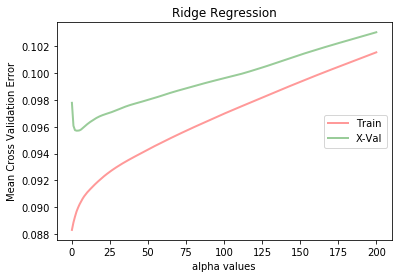

In [35]:
#Ridge Regression
calc_params(X_train, y_train, "alpha", alpha, ridge, "Ridge Regression")

In [36]:
ridge = Ridge(fit_intercept=True, alpha=3.02492)
ridge.fit(X_train, y_train)    
p = ridge.predict(X_test)
MAE = mean_absolute_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))

print 'RMSE on test data: {:.5f} using apha = 3.02492'.format(rmse)
print 'Mean absolute error on test data: {:.5f} using apha = 3.02492'.format(MAE)

RMSE on test data: 0.14411 using apha = 3.02492
Mean absolute error on test data: 0.10059 using apha = 3.02492


The minimum Mean Absolute Error (MAE) is: 0.10903 with alpha: 0.01000


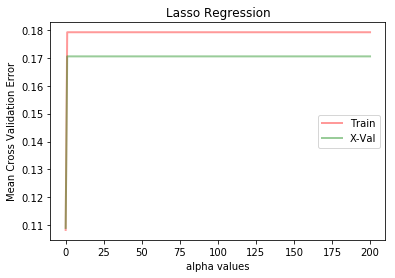

In [37]:
#Lasso Regression
calc_params(X_train, y_train, "alpha", alpha, lasso, "Lasso Regression")

In [38]:
lasso = Lasso(fit_intercept=True, alpha=0.01000)
lasso.fit(X_train, y_train)    
pred = lasso.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))
               
print 'RMSE on test data: {:.5f} using apha = 0.01000'.format(rmse)
print 'Mean absolute error on test data: {:.5f} using apha = 0.01000'.format(MAE)

RMSE on test data: 0.14411 using apha = 0.01000
Mean absolute error on test data: 0.11528 using apha = 0.01000


In the case of ridge regression, the minimum MAE we get on cross validation is when α = 3.02492. Therefore, α = 3.02492 is where we get the best fit model. Using that value of α the MAE we get on the test data set is 0.10088.

In the case of LASSO regression, the lowest MAE we get on cross validation is for α = 0.01. We see that MAE increases as we increase the value of alpha and reaches a point where it remains the same for α value > 0.01.  Therefore, α = 0.01 is where we get the best fit model. Using that value of α the MAE we get on the test data set is 0.11528.

The MAE values on the test data set using both Ridge and LASSO regression are almost same but the MAE for Ridge Regression is less than that for LASSO Regressio. Thus, Ridge regression is a better choice for this dataset.

**e.Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use
the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-
20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by
standard deviation). Prior to fiting the model, perform the scaling
using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search
(using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of
two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the
default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test
data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using
SGDRegressor with the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing
parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults
to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a
summary of your findings from the above experiments.**


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [40]:
#standardize features
x = StandardScaler().fit_transform(x)
#randomized 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [41]:
#Stochastic Gradient Descent
sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 200,400)
}
#Exhaustive search over specified parameter values for an estimator.
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [42]:
#run the grid search
%time _ = gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Wall time: 23.4 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   23.3s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6513797386189534)

In [43]:
#Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='l1', alpha=0.0001)
sgd.fit(X_train, y_train)
pred = sgd.predict(X_test)
MAE = mean_absolute_error(y_test, pred)

print 'MAE on set-aside test data set: {:.5f} with penalty = "l1" and alpha = 0.0001'.format(MAE)

MAE on set-aside test data set: 0.10311 with penalty = "l1" and alpha = 0.0001


The minimum Mean Absolute Error (MAE) is: 0.09456 with l1_ratio: 0.96970


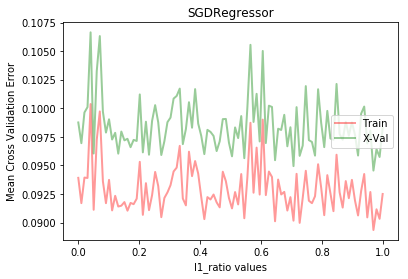

In [44]:
#Model selection to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. 
l1_ratio_range = np.linspace(0.0001,1, 100)

sgd = SGDRegressor(penalty='elasticnet')
calc_params(X_train, y_train, "l1_ratio", l1_ratio_range, sgd, "SGDRegressor")

In [45]:
#Using the best parameters, apply the Elastic Net model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=0.04050)
sgd.fit(X_train, y_train)
pred = sgd.predict(X_test)
MAE = mean_absolute_error(y_test, pred)

print 'MAE on set-aside test data set: {:.5f} with penalty = "l1" and alpha = 0.04050'.format(MAE) 

MAE on set-aside test data set: 0.10230 with penalty = "l1" and alpha = 0.04050


Using Stochastic Gradient Descent for regression, we can see that the best fit model is when penalty='elasticnet' since it has smallest MAE = 0.09457.

**2.Automatic Document Clustering**

**For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2 (see
the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts),
each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The
documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file
"terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual
category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform
clustering on the documents and compare the clusters to the actual categories.**

**a.Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity.
This is the distance function you will use to pass to the kMeans function.**

In [13]:
def cosSim(x, D):
    x_norm = np.linalg.norm(x)
    D_norm = np.linalg.norm(D)
    similarity = np.dot(D,x)/(D_norm * x_norm)
    dists = 1- similarity
    return dists

**b.Load the data set [Note: the data matrix provided has terms as rows and documents as columns.
Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main
data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the
transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see
below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.**

In [17]:
#load data file
import numpy as np
term=np.array(pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t',dtype=str)))
term

array([['aa'],
       ['aargh'],
       ['aaron'],
       ...,
       ['zw'],
       ['zx'],
       ['zz']], dtype=object)

In [18]:
classes = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ',dtype=int,skip_header=1))
classes = classes.drop(classes.columns[0], axis=1)
classes.head()

,1
0,0
1,1
2,1
3,1
4,2


In [19]:
term.shape

(9328L, 1L)

In [20]:
# document x term matrix
matrix = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',',dtype=int).T)
matrix.shape

(2500, 9328)

In [21]:
matrix.head()

,0,1,2,3,...,9324,9325,9326,9327
0,0,0,0,0,...,0,0,0,0
1,0,0,0,0,...,0,0,0,0
2,0,0,0,0,...,0,0,0,0
3,0,0,0,0,...,0,0,0,0
4,0,0,0,0,...,0,0,0,0


In [23]:
#Split the data set 80%-20%
from sklearn.cross_validation import train_test_split
d_train, d_test, classes_train, classes_test = train_test_split(matrix, classes, test_size=0.2, random_state=33)

C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
print d_train.shape, d_test.shape, classes_train.shape, classes_test.shape

(2000, 9328) (500, 9328) (2000, 1) (500, 1)


**c.Perform Kmeans clustering on the training data. Write a function to display the top N terms in each
cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value
for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster
has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game"
in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage.
Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters
are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid
is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to
create a word cloud for each cluster.]**

In [54]:
t_train = d_train.T
t_test = d_test.T
numTerms = d_train.shape[1]
numDocs = d_train.shape[0]
print t_train.shape,t_test.shape,numTerms, numDocs

(9328, 2000) (9328, 500) 9328 2000


In [55]:
DF = np.array([(t_train!=0).sum(1)]).T
termFreqs = d_train.sum(axis=1)

In [56]:
Train_Matrix = np.ones(np.shape(t_train), dtype=float)*numDocs
Test_Matrix = np.ones(np.shape(t_test), dtype=float)*numDocs

In [57]:
Train_Matrix

array([[2000., 2000., 2000., ..., 2000., 2000., 2000.],
       [2000., 2000., 2000., ..., 2000., 2000., 2000.],
       [2000., 2000., 2000., ..., 2000., 2000., 2000.],
       ...,
       [2000., 2000., 2000., ..., 2000., 2000., 2000.],
       [2000., 2000., 2000., ..., 2000., 2000., 2000.],
       [2000., 2000., 2000., ..., 2000., 2000., 2000.]])

In [58]:
TrainIDF = np.log2(np.divide(Train_Matrix, DF))
TestIDF = np.log2(np.divide(Test_Matrix, DF))

In [59]:
Train_TFIDF = np.array(t_train * TrainIDF)
Test_TFIDF = np.array(t_test * TestIDF)

In [60]:
newTrain_TFIDF = Train_TFIDF.T
newTest_TFIDF = Test_TFIDF.T

In [61]:
print newTrain_TFIDF.shape,newTest_TFIDF.shape

(2000L, 9328L) (500L, 9328L)


In [62]:
newTest_TFIDF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
newTrain_TFIDF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
newTrain_TFIDF[np.isnan(newTrain_TFIDF)] = 0
newTest_TFIDF[np.isnan(newTest_TFIDF)] = 0
newTrain_TFIDF[newTrain_TFIDF == inf] = 0
newTrain_TFIDF[newTrain_TFIDF == -inf] = 0
newTest_TFIDF[newTest_TFIDF == inf] = 0
newTest_TFIDF[newTest_TFIDF == -inf] = 0

In [25]:
#implementation from Chapter-10
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
        
    return centroids 

def kMeans(dataSet, k, distMeas=cosSim, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2

        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [27]:
def top_terms(data, K, numterms):
    centroids, clustersAssment = kMeans(mat(data), K, distMeas=cosSim)
    #top n terms, their frequency, and % of docs they're in for each cluster
    for i in range(K):
        print 'Cluster',i+1,': '
        cluster_doc_term = data[clustersAssment[:,0]==i]
        print 'Number of elements in Cluster ',i+1,': ', cluster_doc_term.shape[0]
        cluster_doc_freq = np.array([(cluster_doc_term.T!=0).sum(1)]).T   #calculating DF
        #Get % of docs, terms are in for each cluster
        term_doc_cluster = cluster_doc_freq/float(cluster_doc_term.shape[0])
        term_doc_cluster = map(list, term_doc_cluster)
        term_doc_cluster = [elem[0] for elem in term_doc_cluster]
        cluster_doc_freq = [elem[0] for elem in cluster_doc_freq]
        #Zip terms, document frequency and the cluster assignment
        a=sorted(zip(term, cluster_doc_freq, term_doc_cluster),key=lambda x:x[2],reverse=True) #Sort in decreasing order
        #print(a)
        for elem in a[:numterms]:
            print 'Term: ',elem[0]
            print 'Frequency: ',elem[1]
            print '% of docs in cluster containing term ', elem[0], ': ',elem[2]*100,'\n'
        print '\n'
    return centroids, clustersAssment

centroids, clustersAssment = top_terms(newTrain_TFIDF, 5, 10) #Taking top 10 terms

NameError: name 'newTrain_TFIDF' is not defined

In [29]:
centroids, clustersAssment = kMeans(mat(data), K, distMeas=cosSim)

centroids

NameError: name 'mat' is not defined

In [68]:
clustersAssment

array([[1.        , 0.8044974 ],
       [1.        , 0.89601906],
       [1.        , 0.74209276],
       ...,
       [0.        , 0.45081749],
       [4.        , 0.58533067],
       [3.        , 0.65225988]])

**Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values**

In [69]:
# 5 clusters
c1 = pd.DataFrame(newTrain_TFIDF[clustersAssment[:,0]==0])
c2 = pd.DataFrame(newTrain_TFIDF[clustersAssment[:,0]==1])
c3 = pd.DataFrame(newTrain_TFIDF[clustersAssment[:,0]==2])
c4 = pd.DataFrame(newTrain_TFIDF[clustersAssment[:,0]==3])
c5 = pd.DataFrame(newTrain_TFIDF[clustersAssment[:,0]==4])

In [70]:
c1.columns = term.T[0]
c2.columns = term.T[0]
c3.columns = term.T[0]
c4.columns = term.T[0]
c5.columns = term.T[0]

In [71]:
c1_DF = list(np.array((c1.T!=0).sum(1).T))
c2_DF = list(np.array((c2.T!=0).sum(1).T))
c3_DF = list(np.array((c3.T!=0).sum(1).T))
c4_DF = list(np.array((c4.T!=0).sum(1).T))
c5_DF = list(np.array((c5.T!=0).sum(1).T))

In [72]:
term_list = list(term.T[0])

In [73]:
c1_string = ""
c2_string = ""
c3_string = ""
c4_string = ""
c5_string = ""

In [74]:
index = 0
for i in c1_DF:
    for j in range(i):
        c1_string += term_list[index] + " "
    index += 1

index = 0
for i in c2_DF:
    for j in range(i):
        c2_string += term_list[index] + " "
    index += 1

index = 0
for i in c3_DF:
    for j in range(i):
        c3_string += term_list[index] + " "
    index += 1
    
index = 0
for i in c4_DF:
    for j in range(i):
        c4_string += term_list[index] + " "
    index += 1
    
index = 0
for i in c5_DF:
    for j in range(i):
        c5_string += term_list[index] + " "
    index += 1

In [75]:
from wordcloud import WordCloud

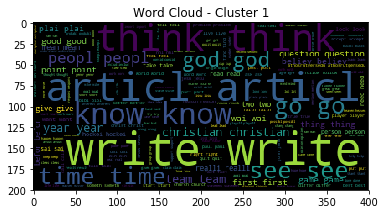

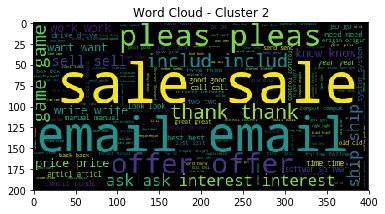

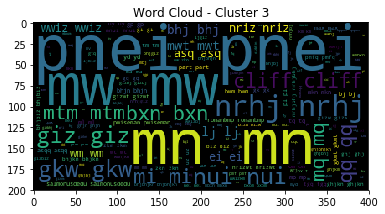

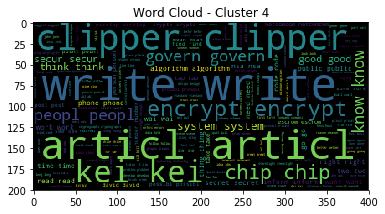

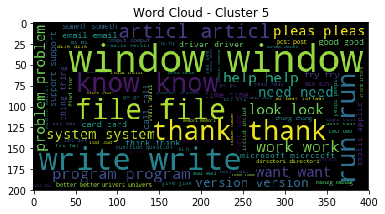

In [76]:
c1_wordcloud = WordCloud(background_color='black').generate(c1_string)
plt.imshow(c1_wordcloud)
plt.title('Word Cloud - Cluster 1')
plt.show()

c2_wordcloud = WordCloud(background_color='black').generate(c2_string)
plt.imshow(c2_wordcloud)
plt.title('Word Cloud - Cluster 2')
plt.show()

c3_wordcloud = WordCloud(background_color='black').generate(c3_string)
plt.imshow(c3_wordcloud)
plt.title('Word Cloud - Cluster 3')
plt.show()

c4_wordcloud = WordCloud(background_color='black').generate(c4_string)
plt.imshow(c4_wordcloud)
plt.title('Word Cloud - Cluster 4')
plt.show()

c5_wordcloud = WordCloud(background_color='black').generate(c5_string)
plt.imshow(c5_wordcloud)
plt.title('Word Cloud - Cluster 5')
plt.show()

**d.Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned
classes by computing the Completeness and Homogeneity values.**

In [77]:
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(np.array(classes_train.T)[0],clustersAssment[:,0])
homogeneity = homogeneity_score(np.array(classes_train.T)[0],clustersAssment[:,0])

print 'Completeness of Cluster: {:.4f}'.format(completeness)
print 'Homogeneity of Clusters: {:.4f}'.format(homogeneity)

Completeness of Cluster: 0.7470
Homogeneity of Clusters: 0.6370


**e.Finally, using your cluster assignments as class labels, categorize each of the documents in the 20%
set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine
similarity between each test document and cluster centroids. For each test document show the predicted
class label as well as Cosine similarity to the corresponding cluster.**

In [78]:
records = []
for test_doc in newTest_TFIDF:
    dic = {}
    sim = []
    cluster=1
    for centroid in centroids:
        sim.append(1-cosSim(test_doc, centroid)) 
        dic['Similarity With Cluster '+str(cluster)] = 1 - cosSim(test_doc, centroid)
        cluster+=1
    dic['Predicted Class Label'] = sim.index(max(sim))+1
    records.append(dic)
test_cluster = pd.DataFrame(records)
test_cluster.head(5)

,Predicted Class Label,Similarity With Cluster 1,Similarity With Cluster 2,Similarity With Cluster 3,Similarity With Cluster 4,Similarity With Cluster 5
0,1,0.086173,0.031234,0.000003,0.038634,0.032349
1,1,0.119307,0.065961,0.000003,0.110669,0.060599
2,2,0.022453,0.070268,0.000013,0.015227,0.012359
3,5,0.095620,0.100012,0.000006,0.098299,0.238984
4,2,0.056672,0.178071,0.000004,0.027253,0.035443
